<a href="https://colab.research.google.com/github/mohammadAliMkh/Tensorflow/blob/main/skimLit_nlp_milestone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/Franck-Dernoncourt/pubmed-rct.git'

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.


In [2]:
file_dir = '/content/pubmed-rct/' + 'PubMed_20k_RCT_numbers_replaced_with_at_sign'
file_dir

'/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign'

In [3]:
file_path = file_dir + "/train.txt"
with open(file_path, 'r') as f:
  train_lines = f.readlines()

In [4]:
def prepare_data_without_total_lines(train_lines):
  a = 0
  line_number = 0
  total_lines_list = []
  our_train_list = []
  for line in train_lines:
    if '###2' in line:
      if a>0:
        total_lines_list.append(line_number-1)
      line_number = 0
      a = a + 1
    else:
      if line != '\n':
        line_splitted = line.split("\t")
        target = line_splitted[0]
        text = line_splitted[1]
        our_train_list.append({"line_number":line_number , "target":target, "text": text})
        line_number = line_number + 1
  return total_lines_list, our_train_list

def add_total_lines_to_the_dictionary(train_lines , total_lines_list):
  a = 0
  line_number = 0
  our_train_list = []
  for line in train_lines:
    if '###2' in line:
      line_number = 0
      total_lines = total_lines_list[a]
      a = a +1
    else:
      if line != '\n':
        line_splitted = line.split("\t")
        target = line_splitted[0]
        text = line_splitted[1].split("\n")[0]
        our_train_list.append({"line_number":line_number, "total_lines":total_lines , "target":target, "text": text})
        line_number = line_number + 1
  return our_train_list


In [5]:
def prepare_data_in_dictionary_format(lines , kind):
  total_lines_list , our_train_list = prepare_data_without_total_lines(lines)
  if(kind == 0):
    ## for train 20k
    total_lines_list.append(11)
  elif (kind == 1):
    ## for test  20K
    total_lines_list.append(17)
  else:
    total_lines_list.append(13)
  print(len(total_lines_list) , len(our_train_list))
  train_dictionary = add_total_lines_to_the_dictionary(lines, total_lines_list)
  return train_dictionary

In [6]:
train_dictionary = prepare_data_in_dictionary_format(train_lines , 0)

15000 180040


In [7]:
train_dictionary[-10:]

[{'line_number': 2,
  'total_lines': 11,
  'target': 'METHODS',
  'text': 'This trial was a prospective , randomized , controlled , multicenter study .'},
 {'line_number': 3,
  'total_lines': 11,
  'target': 'METHODS',
  'text': 'Eligible patients who underwent PCI were randomly assigned to atorvastatin alone or atorvastatin plus ezetimibe ( @ mg ) daily .'},
 {'line_number': 4,
  'total_lines': 11,
  'target': 'METHODS',
  'text': 'Atorvastatin was uptitrated with a treatment goal of low-density lipoprotein cholesterol ( LDL-C ) < @ mg/dl .'},
 {'line_number': 5,
  'total_lines': 11,
  'target': 'METHODS',
  'text': 'Serial volumetric intravascular ultrasound was performed at baseline and again at @ to @ months to quantify the coronary plaque response in @ patients .'},
 {'line_number': 6,
  'total_lines': 11,
  'target': 'RESULTS',
  'text': 'The combination of atorvastatin/ezetimibe resulted in lower levels of LDL-C than atorvastatin monotherapy ( @ @ mg/dl vs. @ @ mg/dl ; p < @ ) .

In [8]:
file_path = file_dir + "/test.txt"
with open(file_path, 'r') as f:
  test_lines = f.readlines()

In [9]:
test_dictionary = prepare_data_in_dictionary_format(test_lines, 1)

2500 30135


In [10]:
test_dictionary[:10]

[{'line_number': 0,
  'total_lines': 8,
  'target': 'BACKGROUND',
  'text': 'This study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .'},
 {'line_number': 1,
  'total_lines': 8,
  'target': 'RESULTS',
  'text': 'A post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .'},
 {'line_number': 2,
  'total_lines': 8,
  'target': 'RESULTS',
  'text': 'Liver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .'},
 {'line_number': 3,
  'total_lines': 8,
  'target': 'RESULTS',
  'text': 'Survival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( 

In [11]:
file_path = file_dir + "/dev.txt"
with open(file_path, 'r') as f:
  validation_lines = f.readlines()

In [12]:
validation_dictionary = prepare_data_in_dictionary_format(validation_lines, 2)

2500 30212


In [13]:
validation_dictionary[:11]

[{'line_number': 0,
  'total_lines': 9,
  'target': 'BACKGROUND',
  'text': 'IgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .'},
 {'line_number': 1,
  'total_lines': 9,
  'target': 'BACKGROUND',
  'text': 'It is not clear whether these patients would benefit from antifungal treatment .'},
 {'line_number': 2,
  'total_lines': 9,
  'target': 'OBJECTIVE',
  'text': 'We sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus .'},
 {'line_number': 3,
  'total_lines': 9,
  'target': 'METHODS',
  'text': 'Asthmatic patients who were IgE sensitized to A fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .'},
 {'line_

In [14]:
len(train_dictionary) , len(test_dictionary) , len(validation_dictionary)

(180040, 30135, 30212)

In [15]:
import pandas as pd

In [16]:
train_pd = pd.DataFrame(train_dictionary)
validation_pd = pd.DataFrame(validation_dictionary)
test_pd = pd.DataFrame(test_dictionary)

In [17]:
train_pd.head(20)

,line_number,total_lines,target,text
0,0,11,OBJECTIVE,To investigate the efficacy of @ weeks of dail...
1,1,11,METHODS,A total of @ patients with primary knee OA wer...
2,2,11,METHODS,Outcome measures included pain reduction and i...
3,3,11,METHODS,Pain was assessed using the visual analog pain...
4,4,11,METHODS,Secondary outcome measures included the Wester...
5,5,11,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ..."
6,6,11,RESULTS,There was a clinically relevant reduction in t...
7,7,11,RESULTS,The mean difference between treatment arms ( @...
8,8,11,RESULTS,"Further , there was a clinically relevant redu..."
9,9,11,RESULTS,These differences remained significant at @ we...


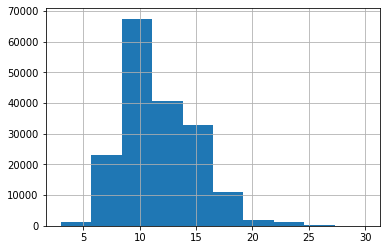

In [18]:
train_pd["total_lines"].hist()

In [19]:
train_txt = train_pd["text"].tolist()
validation_txt = validation_pd["text"].tolist()
test_txt = test_pd["text"].tolist()

In [20]:
train_label = train_pd["target"].tolist()
validation_label = validation_pd["target"].tolist()
test_label = test_pd["target"].tolist()

In [21]:
train_label[:10]

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS']

In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf

In [23]:
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_onehot = one_hot_encoder.fit_transform(train_pd["target"].to_numpy().reshape(-1 , 1))
validation_labels_onehot = one_hot_encoder.fit_transform(validation_pd["target"].to_numpy().reshape(-1 , 1))
test_labels_onehot = one_hot_encoder.fit_transform(test_pd["target"].to_numpy().reshape(-1 , 1))

In [24]:
label_encoder = LabelEncoder()
train_label_enc = label_encoder.fit_transform(train_pd["target"])
validation_label_enc = label_encoder.fit_transform(validation_pd["target"])
test_label_enc = label_encoder.fit_transform(test_pd["target"])

In [25]:
#train_txt , validation_txt , test_txt
#train_labels_onehot , validation_labels_onehot , test_labels_onehot
#train_label_enc , validation_label_enc , test_label_enc

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [27]:
from re import X
model0 = Pipeline([
                   ("tf-idf" , TfidfVectorizer()),
                   ("clf" , MultinomialNB())
])

model0.fit(X = train_txt , y = train_label_enc)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
model0.score(validation_txt , validation_label_enc)

0.7218323844829869

In [29]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

--2022-12-25 12:02:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-25 12:02:01 (77.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [30]:
from helper_functions import calculate_results

In [31]:
model0_predicts = model0.predict(validation_txt)
model0_predicts

array([4, 1, 3, ..., 4, 4, 1])

In [32]:
validation_label_enc

array([0, 0, 3, ..., 4, 1, 1])

In [33]:
model0_results = calculate_results(validation_label_enc , model0_predicts)
model0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [34]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding

In [35]:
vocabs = 0
for text in train_txt:
  vocabs = len(text.split()) + vocabs

In [36]:
max_tokens = 68000
output_seq_lengh = 55

In [37]:
text_vectorizer = TextVectorization(max_tokens = max_tokens , output_sequence_length = output_seq_lengh)

In [38]:
text_vectorizer.adapt(train_txt)

In [39]:
print(train_txt[5])
text_vectorizer(train_txt[5])

Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .


<tf.Tensor: shape=(55,), dtype=int64, numpy=
array([ 225,   93,    4, 1394,  460,  460,  724, 2046,  432, 1558,    3,
       3243, 1371,  396, 1930,    9,  156,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])>

In [40]:
vocabs = text_vectorizer.get_vocabulary()
ten_least_common_vocabs = text_vectorizer.get_vocabulary()[-10:]
ten_most_common_vocabs = text_vectorizer.get_vocabulary()[:10]

In [41]:
len(vocabs)

64841

In [42]:
text_embedder = Embedding(input_dim = len(vocabs) , output_dim = 128 , mask_zero=True)

In [43]:
print(train_txt[10])
embedded_txt = text_embedder(text_vectorizer([train_txt[10]]))
print(embedded_txt)
print(embedded_txt.shape)

The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .
tf.Tensor(
[[[-0.0438883  -0.04267414 -0.02861594 ...  0.02246753  0.01617802
    0.04347991]
  [-0.03095381 -0.01001614 -0.01503279 ... -0.02149606  0.04839567
    0.01922773]
  [ 0.02423928  0.01992028  0.01942239 ...  0.03960233 -0.01356162
    0.01001725]
  ...
  [ 0.02121842  0.02498431  0.01456188 ...  0.02163831 -0.04261623
   -0.00699087]
  [ 0.02121842  0.02498431  0.01456188 ...  0.02163831 -0.04261623
   -0.00699087]
  [ 0.02121842  0.02498431  0.01456188 ...  0.02163831 -0.04261623
   -0.00699087]]], shape=(1, 55, 128), dtype=float32)
(1, 55, 128)


In [44]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_txt , train_labels_onehot))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_txt , validation_labels_onehot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_txt , test_labels_onehot))

In [45]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [46]:
input1 = tf.keras.layers.Input(shape = (1,) ,  dtype = tf.string , name = "input_layer_model1")
text_vectorized = text_vectorizer(input1)
text_tokens = text_embedder(text_vectorized)
x = tf.keras.layers.Conv1D(64 , 5 ,padding = "same", activation = "relu" , name = "conv1_model1")(text_tokens)
x = tf.keras.layers.GlobalAveragePooling1D(name = "global_model1")(x)
output1 = tf.keras.layers.Dense(5 , activation = "softmax" , name = "output_layer_model1")(x)


model1 = tf.keras.Model(input1 , output1)

In [47]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_model1 (InputLa  [(None, 1)]              0         
 yer)                                                            
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 conv1_model1 (Conv1D)       (None, 55, 64)            41024     
                                                                 
 global_model1 (GlobalAverag  (None, 64)               0         
 ePooling1D)                                                     
                                                             

In [48]:
model1.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.Adam() , metrics = ["accuracy"])

In [49]:
from helper_functions import create_tensorboard_callback

In [50]:
history1 = model1.fit(train_dataset , epochs = 3 , steps_per_epoch=len(train_dataset) , validation_data = validation_dataset, validation_steps=len(validation_dataset), callbacks = [create_tensorboard_callback("/content/models" , "model1")])

Saving TensorBoard log files to: /content/models/model1/20221225-120220
Epoch 1/3
5627/5627 [==============================] - 56s 9ms/step - loss: 0.6147 - accuracy: 0.7759 - val_loss: 0.5331 - val_accuracy: 0.8105
Epoch 2/3
5627/5627 [==============================] - 47s 8ms/step - loss: 0.4510 - accuracy: 0.8420 - val_loss: 0.5308 - val_accuracy: 0.8124
Epoch 3/3
5627/5627 [==============================] - 47s 8ms/step - loss: 0.3702 - accuracy: 0.8731 - val_loss: 0.5639 - val_accuracy: 0.8081


In [51]:
import matplotlib.pyplot as plt
import pandas as pd

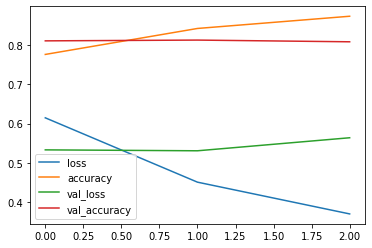

In [52]:
pd.DataFrame(history1.history).plot()

In [53]:
model1_evaluation = model1.evaluate(validation_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5639 - accuracy: 0.8081


In [54]:
model1_predicts = model1.predict(validation_txt)
model1_predicts = tf.argmax(model1_predicts , axis = 1)

945/945 [==============================] - 3s 3ms/step


In [55]:
model1_predicts.numpy() , validation_label_enc

(array([0, 0, 3, ..., 4, 1, 1]), array([0, 0, 3, ..., 4, 1, 1]))

In [56]:
model1_results = calculate_results(validation_label_enc , model1_predicts.numpy())
model1_results

{'accuracy': 80.80895008605852,
 'precision': 0.8049418239957236,
 'recall': 0.8080895008605852,
 'f1': 0.8053943114979047}

In [57]:
import tensorflow_hub as hub

In [58]:
USE_embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4" , trainable = False , name = "universal_sentence_encoder")

In [59]:
input2 = tf.keras.layers.Input(shape = [] , dtype = tf.string , name = "input_layer_model2")
tokens = USE_embed(input2)
x = tf.keras.layers.Dense(64 , activation="relu" , name = "dense1_layer_model2")(tokens)
output2 = tf.keras.layers.Dense(5 , activation = "softmax" , name = "dense2_layer_model2")(x)

model2 = tf.keras.Model(input2 , output2)

In [60]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_model2 (InputLa  [(None,)]                0         
 yer)                                                            
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense1_layer_model2 (Dense)  (None, 64)               32832     
                                                                 
 dense2_layer_model2 (Dense)  (None, 5)                325       
                                                                 
Total params: 256,830,981
Trainable params: 33,157
Non-trainable params: 256,797,824
_________________________________________________________________


In [61]:
model2.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.Adam() , metrics = ["accuracy"])

In [62]:
history2 = model2.fit(train_dataset , epochs = 3 ,steps_per_epoch=len(train_dataset) ,  validation_data = validation_dataset , validation_steps=len(validation_dataset) , callbacks = [create_tensorboard_callback("/content/models" , "model2")])

Saving TensorBoard log files to: /content/models/model2/20221225-120614
Epoch 1/3
5627/5627 [==============================] - 74s 13ms/step - loss: 0.7551 - accuracy: 0.7107 - val_loss: 0.6825 - val_accuracy: 0.7385
Epoch 2/3
5627/5627 [==============================] - 71s 13ms/step - loss: 0.6611 - accuracy: 0.7492 - val_loss: 0.6436 - val_accuracy: 0.7547
Epoch 3/3
5627/5627 [==============================] - 69s 12ms/step - loss: 0.6279 - accuracy: 0.7614 - val_loss: 0.6258 - val_accuracy: 0.7625


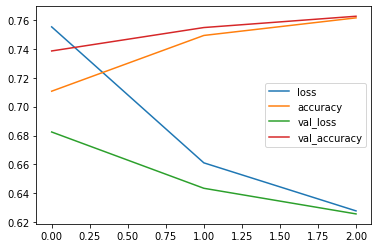

In [63]:
pd.DataFrame(history2.history).plot()

In [64]:
model2_predicts = model2.predict(validation_txt)
model2_predicts = tf.argmax(model2_predicts , 1)
model2_predicts

945/945 [==============================] - 10s 10ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 0, ..., 4, 4, 1])>

In [65]:
model2_predicts.numpy()

array([0, 1, 0, ..., 4, 4, 1])

In [66]:
model2_results = calculate_results( validation_label_enc, model2_predicts.numpy())
model2_results

{'accuracy': 76.24784853700515,
 'precision': 0.7593408046561586,
 'recall': 0.7624784853700516,
 'f1': 0.7579189948145917}

In [67]:
model1_results

{'accuracy': 80.80895008605852,
 'precision': 0.8049418239957236,
 'recall': 0.8080895008605852,
 'f1': 0.8053943114979047}

In [68]:
model0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [69]:
train_txt[0]

'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .'

In [70]:
def token_to_char(text):
  return " ".join(text)

In [71]:
train_char = []
for text in train_txt:
  train_char.append(token_to_char(text))

In [72]:
train_char[0]

'T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .'

In [73]:
a = []
for txt in train_char:
  a.append(len(txt.split()))

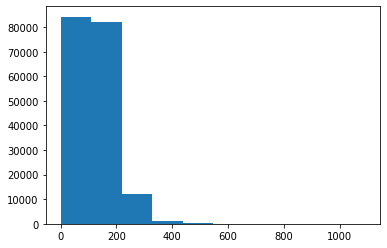

In [74]:
plt.hist(a)
plt.show()

In [75]:
import numpy as np

In [76]:
np.percentile(a , 95) # 95% of the data has almost 239 char-lenght or less

239.0

In [77]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation

In [78]:
validation_char = [token_to_char(txt) for txt in validation_txt]
test_char = [token_to_char(txt) for txt in test_txt]

In [79]:
validation_char_dataset = tf.data.Dataset.from_tensor_slices((validation_char , validation_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_char , train_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_char , test_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [80]:
char_vectorizer = TextVectorization(max_tokens=len(alphabet) + 2  , output_sequence_length=239 , pad_to_max_tokens=True)

In [81]:
char_vectorizer.adapt(train_char)

In [82]:
char_vocabulary = char_vectorizer.get_vocabulary()
print(char_vocabulary)
char_vocabulary[:5] , char_vocabulary[-5:]

['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's', 'd', 'c', 'l', 'h', 'p', 'm', 'u', 'f', 'g', 'y', 'w', 'v', 'b', 'k', 'x', 'z', 'q', 'j']


(['', '[UNK]', 'e', 't', 'i'], ['k', 'x', 'z', 'q', 'j'])

In [83]:
print(train_char[10])
print(len(train_char[10].split()))
print("\n\n")
print(char_vectorizer([train_char[10]]))

T h e   O u t c o m e   M e a s u r e s   i n   R h e u m a t o l o g y   C l i n i c a l   T r i a l s - O s t e o a r t h r i t i s   R e s e a r c h   S o c i e t y   I n t e r n a t i o n a l   r e s p o n d e r   r a t e   w a s   @   %   i n   t h e   i n t e r v e n t i o n   g r o u p   a n d   @   %   i n   t h e   p l a c e b o   g r o u p   (   p   <   @   )   .
157



tf.Tensor(
[[ 3 13  2  7 16  3 11  7 15  2 15  2  5  9 16  8  2  9  4  6  8 13  2 16
  15  5  3  7 12  7 18 19 11 12  4  6  4 11  5 12  3  8  4  5 12  9  7  9
   3  2  7  5  8  3 13  8  4  3  4  9  8  2  9  2  5  8 11 13  9  7 11  4
   2  3 19  4  6  3  2  8  6  5  3  4  7  6  5 12  8  2  9 14  7  6 10  2
   8  8  5  3  2 20  5  9  4  6  3 13  2  4  6  3  2  8 21  2  6  3  4  7
   6 18  8  7 16 14  5  6 10  4  6  3 13  2 14 12  5 11  2 22  7 18  8  7
  16 14 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0 

In [84]:
char_embedding = Embedding(input_dim = len(alphabet) + 2 , output_dim = 25)

In [85]:
print(train_txt[0])
print(f"text lenght without split is {len(train_txt[0])}")
print(f"text lenght with split is {len(train_txt[0].split())}")
print("\n")
print(train_char[0])
print(f"char-text lenght without split is {len(train_char[0])}")
print(f"char-text lenght with split is {len(train_char[0].split())}\n")

print(char_vectorizer([train_char[0]]))
print("\n")
char_embedding(char_vectorizer([train_char[0]]))

To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
text lenght without split is 281
text lenght with split is 49


T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .
char-text lenght without split is 561
char-text lenght with split is 233

tf.Tensor(
[[ 3  7

<tf.Tensor: shape=(1, 239, 25), dtype=float32, numpy=
array([[[-0.00755619, -0.01742066,  0.03722595, ..., -0.02633933,
          0.04632947, -0.0110804 ],
        [ 0.01408975,  0.01281929, -0.0392824 , ...,  0.00087743,
         -0.01090691,  0.04759439],
        [-0.03009952,  0.0136855 ,  0.04937002, ..., -0.03191458,
          0.0122116 ,  0.02526284],
        ...,
        [-0.03444158,  0.03730572, -0.03143328, ..., -0.04246409,
         -0.02649224,  0.02969432],
        [-0.03444158,  0.03730572, -0.03143328, ..., -0.04246409,
         -0.02649224,  0.02969432],
        [-0.03444158,  0.03730572, -0.03143328, ..., -0.04246409,
         -0.02649224,  0.02969432]]], dtype=float32)>

In [86]:
input3 = tf.keras.layers.Input(shape = (1, ) , dtype = tf.string , name = "input_layer_model3")
char_vectors = char_vectorizer(input3)
char_embeds = char_embedding(char_vectors)
x = tf.keras.layers.Conv1D(64 , 5 , padding = "same" , name = "conv_layer_model3")(char_embeds)
x = tf.keras.layers.GlobalMaxPool1D(name = "global_average_pooling_model3")(x)
output3 = tf.keras.layers.Dense(5 , activation = "softmax" , name = "output_layer_model3" )(x)

model3 = tf.keras.Model(input3 , output3)

model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_model3 (InputLa  [(None, 1)]              0         
 yer)                                                            
                                                                 
 text_vectorization_1 (TextV  (None, 239)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 239, 25)           1750      
                                                                 
 conv_layer_model3 (Conv1D)  (None, 239, 64)           8064      
                                                                 
 global_average_pooling_mode  (None, 64)               0         
 l3 (GlobalMaxPooling1D)                                         
                                                           

In [87]:
model3.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.Adam() , metrics = ["accuracy"])

In [88]:
history3 = model3.fit(train_char_dataset , epochs = 3 , steps_per_epoch=len(train_char_dataset) , validation_data = validation_char_dataset , validation_steps=len(validation_char_dataset) , callbacks = [create_tensorboard_callback("/content/models" , "model3")])

Saving TensorBoard log files to: /content/models/model3/20221225-121035
Epoch 1/3
5627/5627 [==============================] - 30s 5ms/step - loss: 0.8997 - accuracy: 0.6475 - val_loss: 0.7818 - val_accuracy: 0.6969
Epoch 2/3
5627/5627 [==============================] - 28s 5ms/step - loss: 0.7556 - accuracy: 0.7116 - val_loss: 0.7388 - val_accuracy: 0.7159
Epoch 3/3
5627/5627 [==============================] - 29s 5ms/step - loss: 0.7202 - accuracy: 0.7265 - val_loss: 0.7190 - val_accuracy: 0.7233


In [89]:
model3_predicts = model3.predict(validation_char)

945/945 [==============================] - 2s 3ms/step


In [90]:
model3_predicts = tf.argmax(model3_predicts , 1)
model3_predicts

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 1, ..., 4, 4, 1])>

In [91]:
model3_results = calculate_results(validation_label_enc , model3_predicts.numpy())

In [92]:
model3_results

{'accuracy': 72.33218588640275,
 'precision': 0.7242701249410082,
 'recall': 0.7233218588640276,
 'f1': 0.7168237276485865}

In [93]:
#part 1 model 4
input1_4 = tf.keras.layers.Input(shape =[] ,dtype = tf.string ,  name = "input1_layer_model4")
token_vectors1_4 = USE_embed(input1_4)
output1_4 = tf.keras.layers.Dense(128 , activation = "relu" , name = "hidden1_1_layer_model4")(token_vectors1_4)
model1_4 = tf.keras.Model(input1_4 , output1_4)


#part 2 model 4
input2_4 = tf.keras.layers.Input(shape = (1 , ) , dtype = tf.string, name = "input2_layer_model4")
char_vectors2_4 = char_vectorizer(input2_4)
token_vectors2_4 = char_embedding(char_vectors2_4)
output2_4 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(28) , name = "bidirectional_layer_model4")(token_vectors2_4)
model2_4 = tf.keras.Model(input2_4 , output2_4)


#concatenation layer model 4
concat_layer = tf.keras.layers.Concatenate(name = "concatenate_layer_model_4")([model1_4.output , model2_4.output])

#last part of the model 4

dropout1 = tf.keras.layers.Dropout(0.5)(concat_layer)
hidden_layer1 = tf.keras.layers.Dense(200 , activation = "relu" , name = "hidden2_layer_model4")(dropout1)
dropout2 = tf.keras.layers.Dropout(0.5)(hidden_layer1)
output4 = tf.keras.layers.Dense(5 , activation = "softmax" , name = "output_layer_model4")(dropout2)

model4 = tf.keras.Model([input1_4 , input2_4] , output4)

model4.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input2_layer_model4 (InputLaye  [(None, 1)]         0           []                               
 r)                                                                                               
                                                                                                  
 input1_layer_model4 (InputLaye  [(None,)]           0           []                               
 r)                                                                                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 239)         0           ['input2_layer_model4[0][0]']    
 orization)                                                                                 

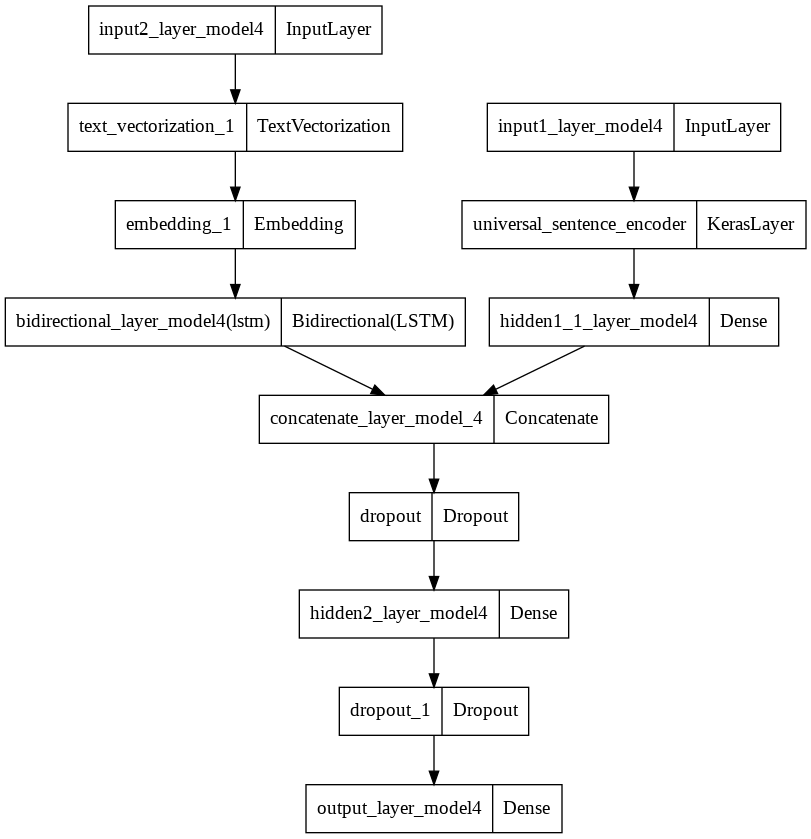

In [94]:
tf.keras.utils.plot_model(model4)

In [95]:
model4.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.Adam() , metrics = ["accuracy"])

In [96]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_txt , train_char))
train_char_token_label = tf.data.Dataset.from_tensor_slices(train_labels_onehot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data , train_char_token_label))

In [97]:
validation_char_token_data = tf.data.Dataset.from_tensor_slices((validation_txt , validation_char))
validation_char_token_label = tf.data.Dataset.from_tensor_slices(validation_labels_onehot)
validation_char_token_dataset = tf.data.Dataset.zip((validation_char_token_data , validation_char_token_label))

In [98]:
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
validation_char_token_dataset = validation_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [99]:
history4 = model4.fit(train_char_token_dataset , epochs = 3 , steps_per_epoch=len(train_char_token_dataset) , validation_data = validation_char_token_dataset , validation_steps=len(validation_char_token_dataset) , callbacks = [create_tensorboard_callback("/content/models" , "model4")])

Saving TensorBoard log files to: /content/models/model4/20221225-121211
Epoch 1/3
5627/5627 [==============================] - 179s 31ms/step - loss: 0.7516 - accuracy: 0.7120 - val_loss: 0.6202 - val_accuracy: 0.7635
Epoch 2/3
5627/5627 [==============================] - 168s 30ms/step - loss: 0.6688 - accuracy: 0.7469 - val_loss: 0.5926 - val_accuracy: 0.7757
Epoch 3/3
5627/5627 [==============================] - 169s 30ms/step - loss: 0.6450 - accuracy: 0.7556 - val_loss: 0.5777 - val_accuracy: 0.7807


In [100]:
model4_prdicts = model4.predict(validation_char_token_dataset)

945/945 [==============================] - 18s 18ms/step


In [101]:
model4_predicts = tf.argmax(model4_prdicts , axis = 1)

In [102]:
model4_results = calculate_results(validation_label_enc , model4_predicts.numpy())

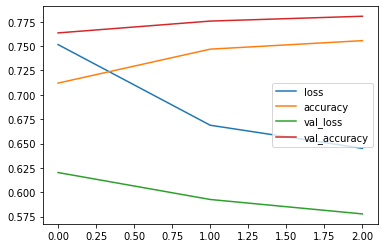

In [103]:
pd.DataFrame(history4.history).plot()

In [104]:
##!zip -r /content/models/model4_skimlit.zip /content/models/model4_skimlit

In [105]:
#model5 real skimlit

In [106]:
line_numbers = train_pd["line_number"].to_numpy()
total_numbers = train_pd["total_lines"].to_numpy()

In [107]:
line_numbers , total_numbers

(array([ 0,  1,  2, ...,  9, 10, 11]), array([11, 11, 11, ..., 11, 11, 11]))

13.0


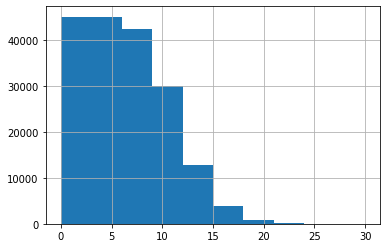

In [108]:
train_pd["line_number"].hist()
print(np.percentile(train_pd["line_number"].to_numpy() , 95))
max_lenght_line_number = 15

18.0


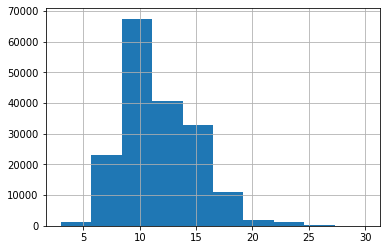

In [109]:
train_pd["total_lines"].hist()
print(np.percentile(train_pd["total_lines"].to_numpy() , 95))
max_lenght_total_number = 20

In [110]:
train_line_numbers_onehot = tf.one_hot(line_numbers , depth = 15)

In [111]:
train_line_numbers_onehot[:5]

<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [112]:
train_total_numbers_onehot = tf.one_hot(total_numbers , depth = 20)

In [113]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_txt , train_char , train_line_numbers_onehot , train_total_numbers_onehot))

In [114]:
train_char_token_pos_label = tf.data.Dataset.from_tensor_slices((train_labels_onehot))

In [115]:
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data , train_char_token_pos_label))

In [116]:
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_char_token_pos_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [117]:
validation_line_number_onehot = tf.one_hot(validation_pd["line_number"].to_numpy() , depth = 15)
validation_total_number_onehot = tf.one_hot(validation_pd["total_lines"].to_numpy() , depth = 20)

In [120]:
validation_char_token_pos_data = tf.data.Dataset.from_tensor_slices((validation_txt , validation_char , validation_line_number_onehot , validation_total_number_onehot))
validation_char_token_pos_label = tf.data.Dataset.from_tensor_slices((validation_labels_onehot))
validation_char_token_pos_dataset = tf.data.Dataset.zip((validation_char_token_pos_data , validation_char_token_pos_label))
validation_char_token_pos_dataset = validation_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
validation_char_token_pos_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [121]:
#model 5 - lets create real skimlit

#part1
input1_5 = tf.keras.layers.Input(shape = [] , dtype = tf.string , name = "first_input_model5")
token_vectors1_5 = USE_embed(input1_5)
output1_5 = tf.keras.layers.Dense(128 , activation = "relu" , name = "output1_model5")(token_vectors1_5)
model1_5 = tf.keras.Model(input1_5 , output1_5)


input2_5 = tf.keras.layers.Input(shape = (1 , ) , dtype = tf.string , name = "second_input_model5")
char_vectors5 = char_vectorizer(input2_5)
token_vectors2_5 = text_embedder(char_vectors5)
bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(28) , name = "bidirectional_layer_model5_part1")(token_vectors2_5)
model2_5 = tf.keras.Model(input2_5 , bi_lstm)


#concatenate part 1 & 2
concatenate_layer_1_5 = tf.keras.layers.Concatenate(name = "concatenate_layer_model5")([model1_5.output , model2_5.output])
output_concatenate_1_5 = tf.keras.layers.Dense(128 , activation = "relu" , name = "output_layer_concatenation1")(concatenate_layer_1_5)
dropout1 = tf.keras.layers.Dropout(0.5 , name = "dropout1")(output_concatenate_1_5)


#part3
input3_5 = tf.keras.layers.Input(shape = (15,) ,dtype = tf.float32 , name = "input_layer_for_line_positions_model5")
output3_5 = tf.keras.layers.Dense(32 , activation = "relu" , name = "dense3_5_layer_model5")(input3_5)
model3_5 = tf.keras.Model(input3_5 , output3_5)



#part4
input4_5 = tf.keras.layers.Input(shape = (20,) ,dtype = tf.float32, name = "input_layer_for_total_lines_model5")
output4_5 = tf.keras.layers.Dense(32 , activation = "relu" , name = "dense4_5_layer_model5")(input4_5)
model4_5 = tf.keras.Model(input4_5 , output4_5)



#concatenate part 3 & 4
concatenate_layer_2_5 = tf.keras.layers.Concatenate(name = "concatenate_layer_part_3_and_4")([model3_5.output , model4_5.output])
output_concatenate_2_5 = tf.keras.layers.Dense(64 , activation = "relu" , name = "output_layer_concatenation2")(concatenate_layer_2_5)
dropout2 = tf.keras.layers.Dropout(0.5 , name = "dropout2")(output_concatenate_2_5)

#concatenate part (1 , 2) & (3 , 4)
concatenate_layer_3_5 = tf.keras.layers.Concatenate(name = "concatenate_layer_part1_and_part2")([dropout1 , dropout2])
output_concatenate_3_5 = tf.keras.layers.Dense(128 , activation = "relu" , name = "ouput_layer_concatenation3")(concatenate_layer_3_5)
dropout3 = tf.keras.layers.Dropout(0.5 , name = "dropout3")(output_concatenate_3_5)


#output model5
#bi_lstm_final = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64) , name = "bidirectional_layer_final_model5")(output_concatenate_3_5)
output5 = tf.keras.layers.Dense(5 , activation = "softmax" , name = "ouput_model5")(dropout3)


model5 = tf.keras.Model([input1_5 , input2_5 , input3_5 , input4_5] , output5)

model5.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 second_input_model5 (InputLaye  [(None, 1)]         0           []                               
 r)                                                                                               
                                                                                                  
 first_input_model5 (InputLayer  [(None,)]           0           []                               
 )                                                                                                
                                                                                                  
 text_vectorization_1 (TextVect  (None, 239)         0           ['second_input_model5[0][0]']    
 orization)                                                                                

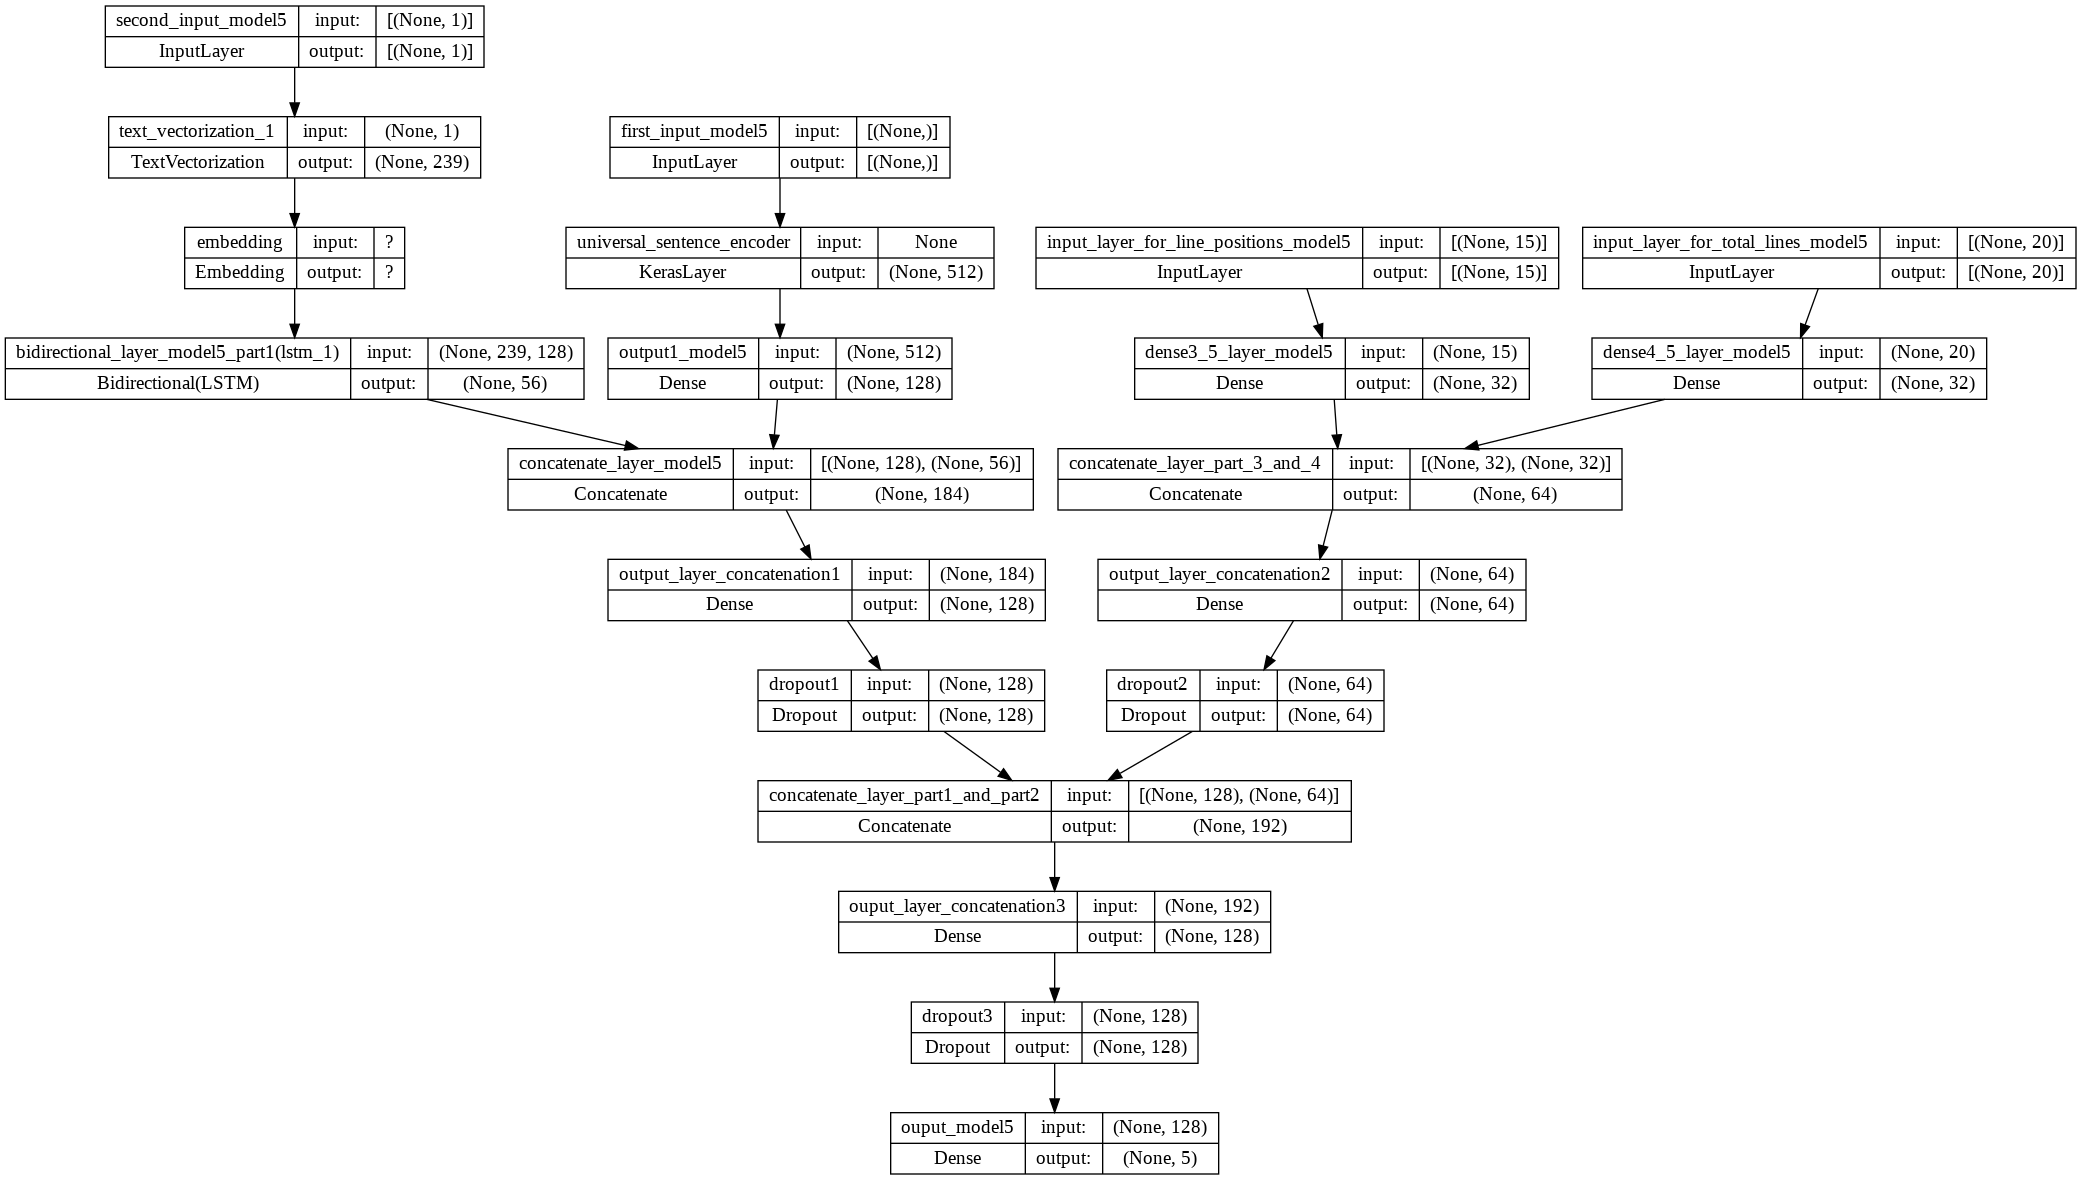

In [122]:
tf.keras.utils.plot_model(model5 , show_shapes = True)

In [123]:
model5.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1) , optimizer = tf.keras.optimizers.Adam() , metrics = ["accuracy"])

In [124]:
history5 = model5.fit(train_char_token_pos_dataset , epochs = 3 , steps_per_epoch=len(train_char_token_pos_dataset) , validation_data = validation_char_token_pos_dataset , validation_steps=len(validation_char_token_pos_dataset) , callbacks = [create_tensorboard_callback("/content/model" , "model5")])

Saving TensorBoard log files to: /content/model/model5/20221225-122346
Epoch 1/3
5627/5627 [==============================] - 275s 47ms/step - loss: 0.7616 - accuracy: 0.8211 - val_loss: 0.6524 - val_accuracy: 0.8651
Epoch 2/3
5627/5627 [==============================] - 259s 46ms/step - loss: 0.6878 - accuracy: 0.8595 - val_loss: 0.6383 - val_accuracy: 0.8704
Epoch 3/3
5627/5627 [==============================] - 258s 46ms/step - loss: 0.6704 - accuracy: 0.8682 - val_loss: 0.6343 - val_accuracy: 0.8728


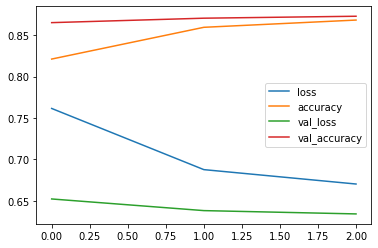

In [125]:
pd.DataFrame(history5.history).plot()

In [126]:
model5_predicts = model5.predict(validation_char_token_pos_dataset)


945/945 [==============================] - 22s 20ms/step


In [127]:
model5_predicts = tf.argmax(model5_predicts , axis = 1)

In [128]:
model5_results = calculate_results(validation_label_enc , model5_predicts.numpy())
model5_results

{'accuracy': 87.27988878591289,
 'precision': 0.8782894894794508,
 'recall': 0.8727988878591288,
 'f1': 0.8690411166766933}

In [129]:
model3_results

{'accuracy': 72.33218588640275,
 'precision': 0.7242701249410082,
 'recall': 0.7233218588640276,
 'f1': 0.7168237276485865}

In [130]:
model2_results

{'accuracy': 76.24784853700515,
 'precision': 0.7593408046561586,
 'recall': 0.7624784853700516,
 'f1': 0.7579189948145917}

In [131]:
model1_results

{'accuracy': 80.80895008605852,
 'precision': 0.8049418239957236,
 'recall': 0.8080895008605852,
 'f1': 0.8053943114979047}

In [132]:
model0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [133]:
all_results = pd.DataFrame({"model0":model0_results , "model1": model1_results , "model2":model2_results , "model3":model3_results,"model4":model4_results , "model5":model5_results})

In [134]:
all_results = all_results.transpose()
all_results["accuracy"] = all_results["accuracy"] / 100

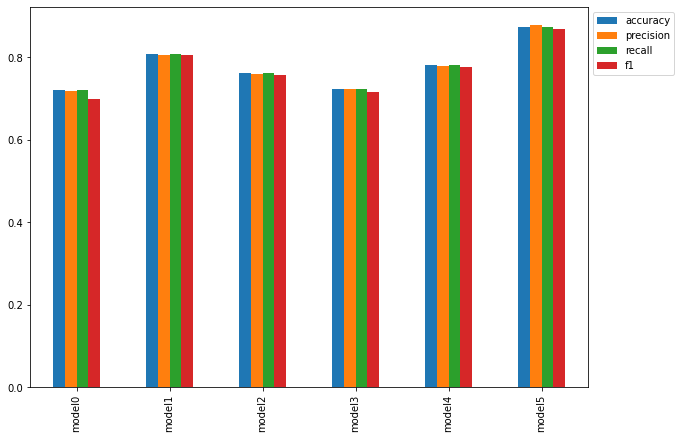

In [135]:
all_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1, 1));

In [136]:
validation_pd.head()

,line_number,total_lines,target,text
0,0,9,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...
1,1,9,BACKGROUND,It is not clear whether these patients would b...
2,2,9,OBJECTIVE,We sought to determine whether a @-month cours...
3,3,9,METHODS,Asthmatic patients who were IgE sensitized to ...
4,4,9,METHODS,Primary outcomes were improvement in quality o...


In [137]:
model5_predicts[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 2, 2])>

In [138]:
validation_label_enc[:5]

array([0, 0, 3, 2, 2])

In [139]:
label_encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [140]:
validation_pd["labels"] = validation_label_enc
validation_pd["predicts"] = model5_predicts.numpy()

In [141]:
validation_pd.head()

,line_number,total_lines,target,text,labels,predicts
0,0,9,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...,0,0
1,1,9,BACKGROUND,It is not clear whether these patients would b...,0,0
2,2,9,OBJECTIVE,We sought to determine whether a @-month cours...,3,0
3,3,9,METHODS,Asthmatic patients who were IgE sensitized to ...,2,2
4,4,9,METHODS,Primary outcomes were improvement in quality o...,2,2


In [142]:
equation = np.where((validation_pd["labels"] == validation_pd["predicts"]) , True , False)
equation

array([ True,  True, False, ...,  True, False,  True])

In [143]:
model5_predict_probs = model5.predict(validation_char_token_pos_dataset)

945/945 [==============================] - 19s 20ms/step


In [144]:
model5_predict_probs = model5_predict_probs.max(axis = 1)

In [145]:
validation_pd["equ"] = equation

In [146]:
validation_pd["probs"] = model5_predict_probs
validation_pd

,line_number,total_lines,target,text,labels,predicts,equ,probs
0,0,9,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...,0,0,True,0.705052
1,1,9,BACKGROUND,It is not clear whether these patients would b...,0,0,True,0.695842
2,2,9,OBJECTIVE,We sought to determine whether a @-month cours...,3,0,False,0.461832
3,3,9,METHODS,Asthmatic patients who were IgE sensitized to ...,2,2,True,0.788358
4,4,9,METHODS,Primary outcomes were improvement in quality o...,2,2,True,0.910057
...,...,...,...,...,...,...,...,...
30207,9,13,RESULTS,Pruritus occurred more frequently with the act...,4,4,True,0.923407
30208,10,13,RESULTS,Three patients in the active-regimen group ( @...,4,4,True,0.924219
30209,11,13,RESULTS,Hemoglobin values of grade @ ( @ to < @ g per ...,4,4,True,0.912190
30210,12,13,CONCLUSIONS,Rates of response to a @-week interferon-free ...,1,4,False,0.657290


In [147]:
wrong_prediction = validation_pd[validation_pd["equ"] == False]

In [148]:
most_wrong_predictions = wrong_prediction.sort_values("probs",ascending = False )
most_wrong_predictions

,line_number,total_lines,target,text,labels,predicts,equ,probs
21580,0,12,BACKGROUND,To evaluate the potential efficacy and safety ...,0,3,False,0.967849
15279,0,14,BACKGROUND,To assess the short-term efficacy and safety o...,0,3,False,0.960659
18115,0,11,BACKGROUND,To test the hypothesis that the administration...,0,3,False,0.956040
6709,7,14,METHODS,@ ( @ % ) of the @ eligible patients were enro...,2,4,False,0.954684
4812,11,18,CONCLUSIONS,"On intention-to-treat analysis , both the PKEP...",1,4,False,0.954220
...,...,...,...,...,...,...,...,...
7858,8,16,BACKGROUND,Wound healing can be accelerated with ECA .,0,2,False,0.288635
21850,3,3,CONCLUSIONS,"Our results suggest that oral glucose , even i...",1,2,False,0.288470
9509,4,10,BACKGROUND,The aim of the current study was to analyze th...,0,2,False,0.284831
9808,6,12,RESULTS,Analysis of the value of further information i...,4,2,False,0.279886


In [149]:
most_wrong_predictions.tail(10)

,line_number,total_lines,target,text,labels,predicts,equ,probs
29860,7,7,BACKGROUND,Registered with EudraCT @-@-@ and EudraCT @-@-@ .,0,1,False,0.300088
22620,3,11,OBJECTIVE,The risk detection/executive function ( RD/EF ...,3,2,False,0.299922
16844,4,17,METHODS,The primary aim was to evaluate pharmacokineti...,2,3,False,0.299886
7859,9,16,BACKGROUND,The purpose of the SUPPORT trial is to investi...,0,2,False,0.298739
23369,4,9,METHODS,Primary aim is the assessment of the safety an...,2,4,False,0.297358
7858,8,16,BACKGROUND,Wound healing can be accelerated with ECA .,0,2,False,0.288635
21850,3,3,CONCLUSIONS,"Our results suggest that oral glucose , even i...",1,2,False,0.288470
9509,4,10,BACKGROUND,The aim of the current study was to analyze th...,0,2,False,0.284831
9808,6,12,RESULTS,Analysis of the value of further information i...,4,2,False,0.279886
11709,3,3,CONCLUSIONS,The integrated treatment of traditional Chines...,1,2,False,0.273493


In [150]:
test_char = []
for txt in test_pd["text"].to_numpy():
  test_char.append(token_to_char(txt))

In [151]:
test_line_number = test_pd["line_number"]
test_total_number = test_pd["total_lines"]

In [152]:
test_line_number_onehot = tf.one_hot(test_line_number , depth = 15)
test_line_number_onehot
test_total_number_onehot = tf.one_hot(test_total_number , depth = 20)

In [153]:
test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((test_pd["text"].to_numpy() , test_char, test_line_number_onehot , test_total_number_onehot))

In [154]:
test_labels_onehot = one_hot_encoder.fit_transform(test_pd["target"].to_numpy().reshape(-1 , 1))

In [155]:
test_labels_onehot.shape

(30135, 5)

In [156]:
test_char_token_pos_label = tf.data.Dataset.from_tensor_slices((test_labels_onehot))

In [157]:
test_char_token_pos_dataset = tf.data.Dataset.zip((test_char_token_pos_data , test_char_token_pos_label)).batch(32).prefetch(tf.data.AUTOTUNE)

In [158]:
model5_test_evaluation = model5.evaluate(test_char_token_pos_dataset)

942/942 [==============================] - 20s 21ms/step - loss: 0.6444 - accuracy: 0.8694


In [159]:
model5_test_evaluation

[0.6444154977798462, 0.8694209456443787]

In [160]:
model5_test_predicts = model5.predict(test_char_token_pos_dataset)

942/942 [==============================] - 19s 20ms/step


In [161]:
model5_test_predict_porbs = model5_test_predicts.max(axis = 1)
model5_test_predicts = tf.argmax(model5_test_predicts , axis = 1)

In [162]:
model5_test_predict_porbs

array([0.5522029 , 0.37904733, 0.90128165, ..., 0.855523  , 0.85811853,
       0.92321086], dtype=float32)

In [163]:
model5_test_predicts

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 0, 2, ..., 4, 4, 1])>

In [164]:
test_label

['BACKGROUND',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'OBJECTIVE',
 'OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'R

In [165]:
model5_test_result = calculate_results(test_label_enc, model5_test_predicts.numpy())

In [166]:
model5_test_result

{'accuracy': 86.94209391073503,
 'precision': 0.8733904856457456,
 'recall': 0.8694209391073503,
 'f1': 0.8656222388928156}

In [167]:
test_pd

,line_number,total_lines,target,text
0,0,8,BACKGROUND,This study analyzed liver function abnormaliti...
1,1,8,RESULTS,A post hoc analysis was conducted with the use...
2,2,8,RESULTS,Liver function tests ( LFTs ) were measured at...
3,3,8,RESULTS,Survival analyses were used to assess the asso...
4,4,8,RESULTS,The percentage of patients with abnormal LFTs ...
...,...,...,...,...
30130,13,17,RESULTS,There was a statistically significant between-...
30131,14,17,RESULTS,There were no statistically significant betwee...
30132,15,17,RESULTS,There was no significant association between s...
30133,16,17,RESULTS,No adverse effects were reported .


In [168]:
test_pd["labels"] = test_label_enc
test_pd["predicts"] = model5_test_predicts

equation = np.where((test_pd["labels"] == test_pd["predicts"]) , True , False)
test_pd["equ"] = equation
test_pd["probs"] = model5_test_predict_porbs

In [169]:
wrong_test_predict = test_pd[test_pd["equ"] == False]

In [170]:
most_wrong_test_predict = wrong_test_predict.sort_values("probs" , ascending = False)

In [171]:
most_wrong_test_predict

,line_number,total_lines,target,text,labels,predicts,equ,probs
13860,0,9,BACKGROUND,To evaluate efficacy and side effects of glyci...,0,3,False,0.954592
22736,4,20,OBJECTIVE,"The National Institute of Oncology , Budapest ...",3,2,False,0.953911
16347,0,12,BACKGROUND,To evaluate the effects of the lactic acid bac...,0,3,False,0.953824
12158,9,12,METHODS,"In the saffron group , there was no decline in...",2,4,False,0.951839
23251,3,9,OBJECTIVE,Design and setting A cluster randomised contro...,3,2,False,0.950952
...,...,...,...,...,...,...,...,...
22010,7,15,BACKGROUND,Aim of this prospective randomized trial is to...,0,2,False,0.271728
9663,14,16,BACKGROUND,Primary ethics approval was received from the ...,0,4,False,0.271521
6574,5,11,METHODS,"During BMC , the medical team facilitates the ...",2,4,False,0.267164
7279,3,7,METHODS,We describe the rationale and design of the RE...,2,0,False,0.264567


In [172]:
wild_txt = "The double-blind randomized controlled trial (RCT) is accepted by medicine as objective scientific methodology that, when ideally performed, produces knowledge untainted by bias. The validity of the RCT rests not just on theoretical arguments, but also on the discrepancy between the RCT and less rigorous evidence (the difference is sometimes considered an objective measure of bias). A brief overview of historical and recent developments in \"the discrepancy argument\" is presented. The article then examines the possibility that some of this \"deviation from truth\" may be the result of artifacts introduced by the masked RCT itself. Can an \"unbiased\" method produce bias? Among the experiments examined are those that augment the methodological stringency of a normal RCT in order to render the experiment less susceptible to subversion by the mind. This methodology, a hypothetical \"platinum\" standard, can be used to judge the \"gold\" standard. The concealment in a placebo-controlled RCT seems capable of generating a \"masking bias.\" Other potential biases, such as \"investigator self-selection," "preference,\" and \"consent\" are also briefly discussed. Such potential distortions indicate that the double-blind RCT may not be objective in the realist sense, but rather is objective in a \"softer\" disciplinary sense. Some \"facts\" may not exist independent of the apparatus of their production."
wild_txt = wild_txt.split(".")
wild_txt = wild_txt[:len(wild_txt) - 1]
wild_txt

['The double-blind randomized controlled trial (RCT) is accepted by medicine as objective scientific methodology that, when ideally performed, produces knowledge untainted by bias',
 ' The validity of the RCT rests not just on theoretical arguments, but also on the discrepancy between the RCT and less rigorous evidence (the difference is sometimes considered an objective measure of bias)',
 ' A brief overview of historical and recent developments in "the discrepancy argument" is presented',
 ' The article then examines the possibility that some of this "deviation from truth" may be the result of artifacts introduced by the masked RCT itself',
 ' Can an "unbiased" method produce bias? Among the experiments examined are those that augment the methodological stringency of a normal RCT in order to render the experiment less susceptible to subversion by the mind',
 ' This methodology, a hypothetical "platinum" standard, can be used to judge the "gold" standard',
 ' The concealment in a plac

In [173]:
wild_char = []
for txt in wild_txt:
  wild_char.append(token_to_char(txt))
wild_char

['T h e   d o u b l e - b l i n d   r a n d o m i z e d   c o n t r o l l e d   t r i a l   ( R C T )   i s   a c c e p t e d   b y   m e d i c i n e   a s   o b j e c t i v e   s c i e n t i f i c   m e t h o d o l o g y   t h a t ,   w h e n   i d e a l l y   p e r f o r m e d ,   p r o d u c e s   k n o w l e d g e   u n t a i n t e d   b y   b i a s',
 '  T h e   v a l i d i t y   o f   t h e   R C T   r e s t s   n o t   j u s t   o n   t h e o r e t i c a l   a r g u m e n t s ,   b u t   a l s o   o n   t h e   d i s c r e p a n c y   b e t w e e n   t h e   R C T   a n d   l e s s   r i g o r o u s   e v i d e n c e   ( t h e   d i f f e r e n c e   i s   s o m e t i m e s   c o n s i d e r e d   a n   o b j e c t i v e   m e a s u r e   o f   b i a s )',
 '  A   b r i e f   o v e r v i e w   o f   h i s t o r i c a l   a n d   r e c e n t   d e v e l o p m e n t s   i n   " t h e   d i s c r e p a n c y   a r g u m e n t "   i s   p r e s e n t e d',
 '  T h e   a r t i c l e 

In [174]:
wild_line_numbers = []
i = 0
for txt in wild_txt:
  wild_line_numbers.append(i)
  i = i + 1
wild_line_numbers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [175]:
wild_total_lines = [i-1 for b in range(i)]
wild_total_lines

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [176]:
wild_line_numbers_onehot = tf.one_hot(wild_line_numbers , depth = 15)
wild_total_lines_onehot = tf.one_hot(wild_total_lines , depth = 20)

In [177]:
wild_predict = model5.predict(x = (tf.constant(wild_txt) , tf.constant(wild_char) , wild_line_numbers_onehot , wild_total_lines_onehot))

1/1 [==============================] - 3s 3s/step


In [178]:
wild_predict = tf.argmax(wild_predict , axis = 1)
wild_predict

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 2, 0, 2, 2, 4, 1, 1, 1])>

In [179]:
classes = label_encoder.classes_

In [180]:
wild_predicts = []
for i in wild_predict.numpy():
  wild_predicts.append(classes[i])
wild_predicts

['BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'CONCLUSIONS']

In [181]:
wild_result = pd.DataFrame({"text":wild_txt ,"target":wild_predicts})
wild_result

,text,target
0,The double-blind randomized controlled trial (...,BACKGROUND
1,The validity of the RCT rests not just on the...,BACKGROUND
2,A brief overview of historical and recent dev...,METHODS
3,The article then examines the possibility tha...,BACKGROUND
4,"Can an ""unbiased"" method produce bias? Among ...",METHODS
5,"This methodology, a hypothetical ""platinum"" s...",METHODS
6,The concealment in a placebo-controlled RCT s...,RESULTS
7,""" Other potential biases, such as ""investigato...",CONCLUSIONS
8,Such potential distortions indicate that the ...,CONCLUSIONS
9,"Some ""facts"" may not exist independent of the...",CONCLUSIONS
